In [5]:
from bvp import BVPExtractor

In [6]:
import os
from os import path
import matplotlib.pyplot as plt
import numpy as np

Get pkl files

In [7]:
pkl_files = os.listdir('channel_data')
print(pkl_files)

['1_55BPM.mp4channels.pkl', '2_67BPM.mp4channels.pkl', '3_56BPM.mp4channels.pkl', '4_78BPM.mp4channels.pkl', '66_mid.mp4', '66_mid_Trim.mp4_channels.pkl', '68_david_channels.pkl', '6_59BPM.mp4channels.pkl', '70_farthest.mp4', '70_farthest.mp4_channels.pkl', '75_david_channels.pkl', '79_chris_channels.pkl', 'distance']


In [8]:
pkl_files = [path.join('channel_data', file) for file in pkl_files if path.isfile(path.join('channel_data', file))]

In [9]:
print(pkl_files)

['channel_data\\1_55BPM.mp4channels.pkl', 'channel_data\\2_67BPM.mp4channels.pkl', 'channel_data\\3_56BPM.mp4channels.pkl', 'channel_data\\4_78BPM.mp4channels.pkl', 'channel_data\\66_mid_Trim.mp4_channels.pkl', 'channel_data\\68_david_channels.pkl', 'channel_data\\6_59BPM.mp4channels.pkl', 'channel_data\\70_farthest.mp4_channels.pkl', 'channel_data\\75_david_channels.pkl', 'channel_data\\79_chris_channels.pkl']


In [148]:
bpm = [55,67,56,78,68,59,75,79]
# bpm = [55,67,56,68]
params = [299.9, 4.8, .5, 1.4]

In [149]:
exctractor = BVPExtractor(299.9, 4.8,[ .5, 1.4])

In [150]:
found = []
for file in pkl_files:
    print(file)
    bvp, fs = exctractor.get_BVP_signal(None, False, file)
    found.append(exctractor.find_heartrate(bvp, fs)['bpm'])

channel_data\1_55BPM.mp4channels.pkl
channel_data\2_67BPM.mp4channels.pkl


C:\Users\Spencer Mullinix\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


channel_data\3_56BPM.mp4channels.pkl
channel_data\4_78BPM.mp4channels.pkl
channel_data\68_david_channels.pkl


C:\Users\Spencer Mullinix\anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:253: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


channel_data\6_59BPM.mp4channels.pkl
channel_data\75_david_channels.pkl


C:\Users\Spencer Mullinix\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


channel_data\79_chris_channels.pkl


In [151]:
print(found)

[66.81695621221091, 73.87556821436077, 60.289962871323965, 69.23519807466043, 68.43550150636763, 60.504641061879106, 72.0882680793594, 69.35213546783793]


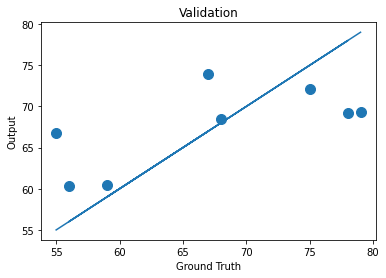

In [159]:
x = np.array(bpm)
y = np.array(found)
m, b = np.polyfit(x,y, 1)

plt.scatter(x,y, s=100)
plt.plot(x, 1*x + 0)
plt.title("Validation")
plt.xlabel("Ground Truth")
# plt.xlim(50,100)
plt.ylabel("Output")
# plt.ylim(50,100)
plt.show()

In [153]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(bpm, found))

In [154]:
rms

6.9475940594134995

In [155]:
# average abs distance
dist = [abs(x-y) for x,y in zip(bpm,found)]
print(sum(dist)/len(dist))

5.7808785305355785


In [156]:
from statistics import pstdev

In [157]:
pstdev(dist)

3.8536355081391087

## Distance Testing

In [28]:
pkl_files = os.listdir('channel_data\distance')
print(pkl_files)

['.ipynb_checkpoints', '65_close.pkl', '66_mid_Trim.mp4_channels.pkl', '70_farthest.mp4_channels.pkl']


In [29]:
pkl_files = [path.join('channel_data\distance', file) for file in pkl_files if ".pkl" in file]

In [30]:
exctractor = BVPExtractor(299.9, 4.8,[ .5, 1.4])

In [31]:
found = []
for file in pkl_files:
    bvp, fs = exctractor.get_BVP_signal(None, False, file)
    found.append(exctractor.find_heartrate(bvp, fs)['bpm'])

In [32]:
print(found)

[60.0041787458539, 63.90532544378698, 61.228482957850396]


## Downsampled

In [43]:
pkl_files = os.listdir('channel_data\downsampled')
print(pkl_files)

['1080_high.mp4_channels.pkl', '540_low.mp4_channels.pkl', '720_mid.mp4_channels.pkl']


In [44]:
pkl_files = [path.join('channel_data\downsampled', file) for file in pkl_files if ".pkl" in file]

In [45]:
exctractor = BVPExtractor(299.9, 4.8,[ .5, 1.4])

In [46]:
found = []
for file in pkl_files:
    bvp, fs = exctractor.get_BVP_signal(None, False, file)
    found.append(exctractor.find_heartrate(bvp, fs)['bpm'])

In [47]:
found

[70.86614173228345, 61.57894736842107, 68.62170087976538]

## Other stuff

In [10]:
import pickle

In [19]:
with open(pkl_files[0], 'rb') as f:
    tester = pickle.load(f)

In [23]:
tester['data'][0]

array([ 81.10362319,  76.41195652, 105.05144928])